In [1]:
import pandas as pd


df = pd.read_csv('Old\cleaned_file_2_cleaned.csv')


lon_min, lon_max = -140, -122
lat_min, lat_max = 45, 55
depth_min, depth_max = 0, 500
temp_min, temp_max = -3, 20
salinity_min, salinity_max = 20, 40


df_cleaned = df[
    (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max) &
    (df['latitude'] >= lat_min) & (df['latitude'] <= lat_max) &
    (df['depth'] >= depth_min) & (df['depth'] <= depth_max) &
    (df['sea_water_temperature'] >= temp_min) & (df['sea_water_temperature'] <= temp_max) &
    (df['sea_water_practical_salinity'] >= salinity_min) & (df['sea_water_practical_salinity'] <= salinity_max)
]


df_cleaned = df_cleaned.reset_index(drop=True)


print(df_cleaned.head())


df_cleaned.to_csv('Old\more_clean_ver.csv', index=False)


                        time  depth   latitude   longitude  \
0  1977-10-03 18:30:00+00:00    0.0  49.582500 -123.270836   
1  1977-10-03 18:50:00+00:00    0.0  49.577500 -123.261665   
2  1977-10-03 19:45:00+00:00    0.0  49.574165 -123.254166   
3  1977-10-03 21:40:00+00:00    0.0  49.570835 -123.244160   
4  1977-10-03 22:00:00+00:00    0.0  49.567500 -123.235000   

   sea_water_temperature  sea_water_practical_salinity  
0              12.896905                     22.719492  
1              12.197073                     22.979715  
2              11.397265                     23.159870  
3              11.997121                     24.641142  
4              12.297049                     24.531048  


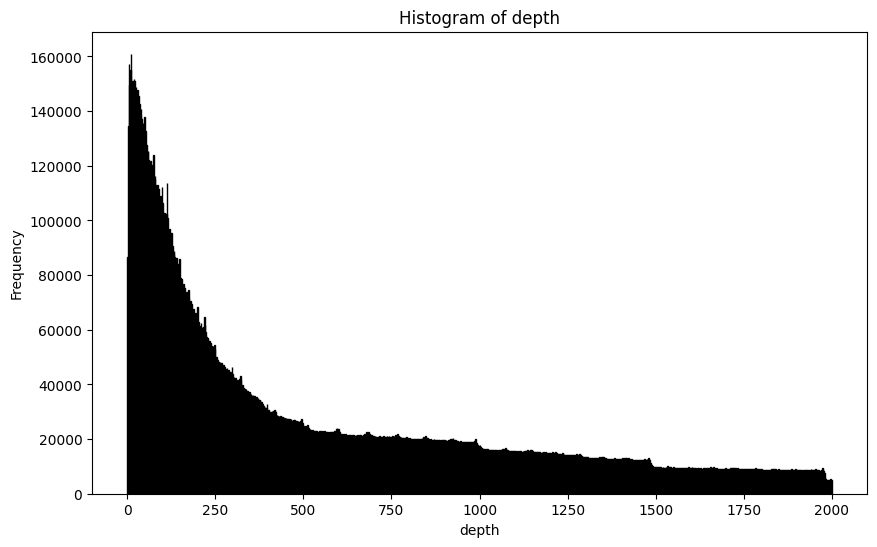

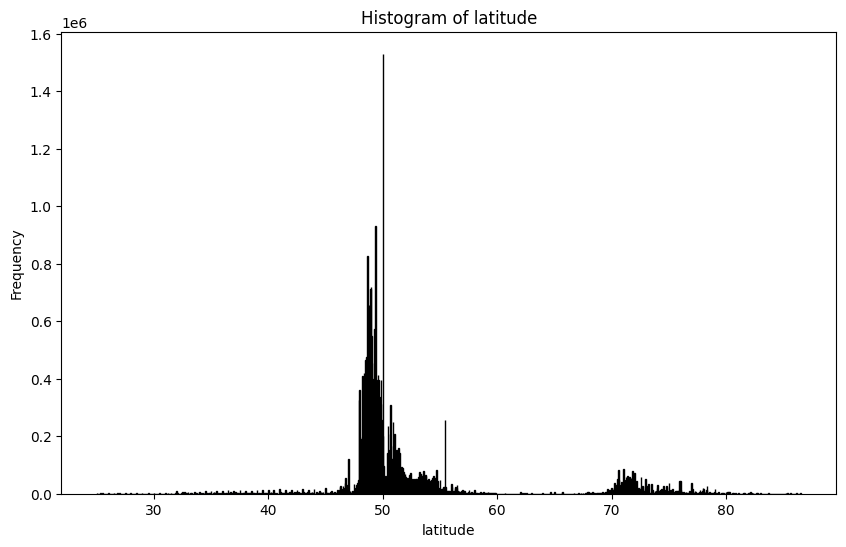

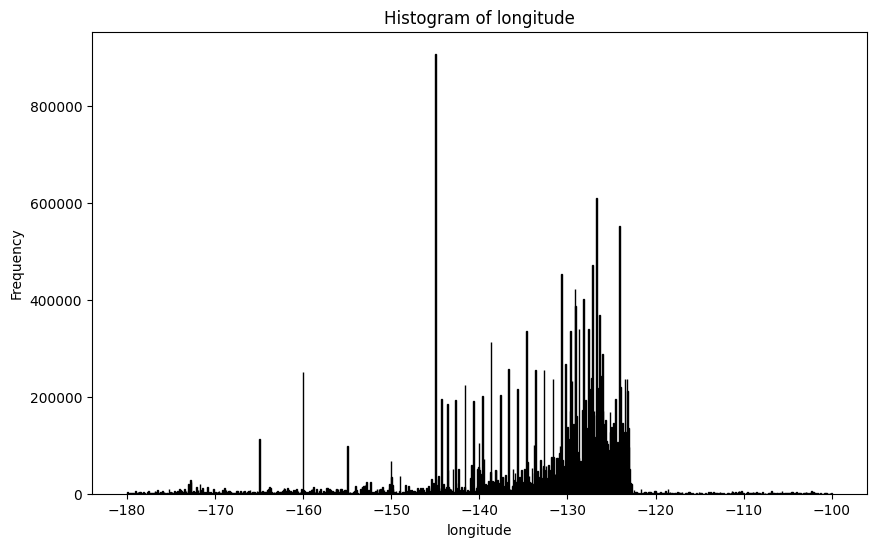

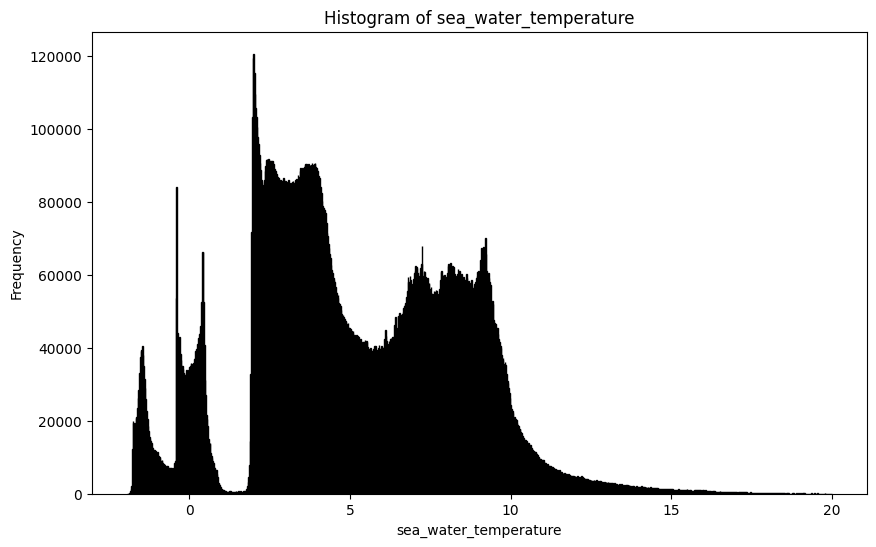

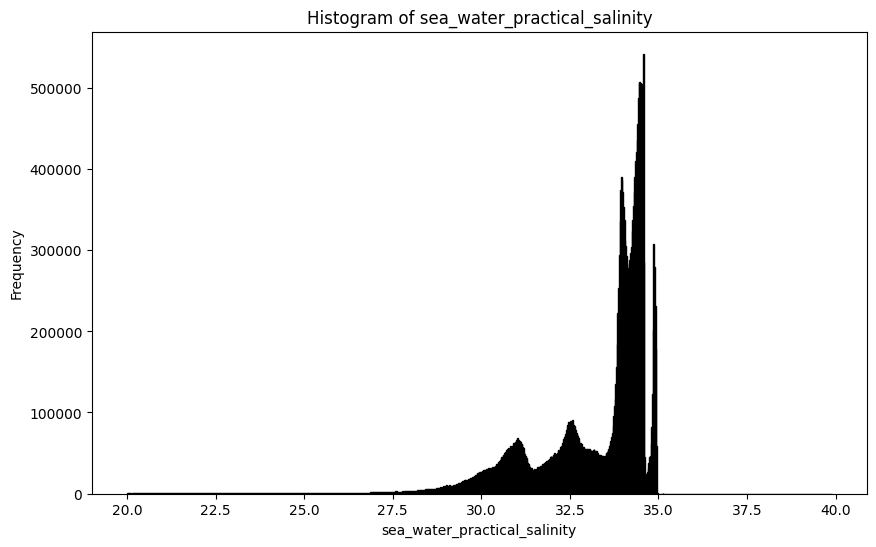

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Old\cleaned_file_2_cleaned.csv')


for column in df.select_dtypes(include=['float64', 'int64']).columns:

    plt.figure(figsize=(10, 6))
    plt.hist(df[column].dropna(), bins=1000, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta

df = pd.read_csv('Old\more_clean_ver.csv')
df['time'] = pd.to_datetime(df['time'])
if (df['depth'] > 0).any():

    df['depth'] = df['depth'] * -1


global_min_lat = df['latitude'].min()
global_max_lat = df['latitude'].max()

global_min_lon = df['longitude'].min()
global_max_lon = df['longitude'].max()

global_min_depth = df['depth'].min()
global_max_depth = df['depth'].max()

global_min_temp = df['sea_water_temperature'].min()
global_max_temp = df['sea_water_temperature'].max()



start_date = datetime(1974, 8, 1)
end_date = datetime(2023, 5, 31)
current_date = start_date
while current_date <= end_date:

    month_data = df[(df['time'].dt.year == current_date.year) & 
                    (df['time'].dt.month == current_date.month)]
    

    if not month_data.empty:

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')


        sc = ax.scatter(month_data['longitude'], month_data['latitude'], 
                month_data['depth'], c=month_data['sea_water_temperature'], 
                cmap='coolwarm', vmin=global_min_temp, vmax=global_max_temp)

        plt.colorbar(sc)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_zlabel('Depth')
        ax.set_xlim(global_min_lon, global_max_lon)
        ax.set_ylim(global_min_lat, global_max_lat)
        ax.set_zlim(global_min_depth, global_max_depth)
        ax.set_title(f'Sea Water Temperature for {current_date.strftime("%B %Y")}')
        plt.savefig(f'sea_temp_img_morecl\sea_temperature_{current_date.strftime("%Y_%m")}.png', bbox_inches='tight')
        plt.close()


    current_date += timedelta(days=31 - current_date.day + 1)

print("Plots generated.")

Plots generated.
